In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Removing Outliers in Python  The Gaussian Distribution  Normal Distribution Data Set/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().any()

Gender    False
Height    False
Weight    False
dtype: bool

In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [6]:
df.shape

(8555, 3)

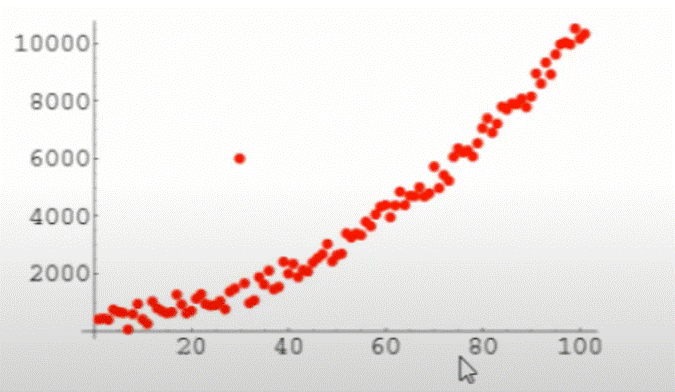

In [7]:
from PIL import Image
img=Image.open("Removing Outliers in Python  The Gaussian Distribution  Normal Distribution Data Set/out.gif")
img

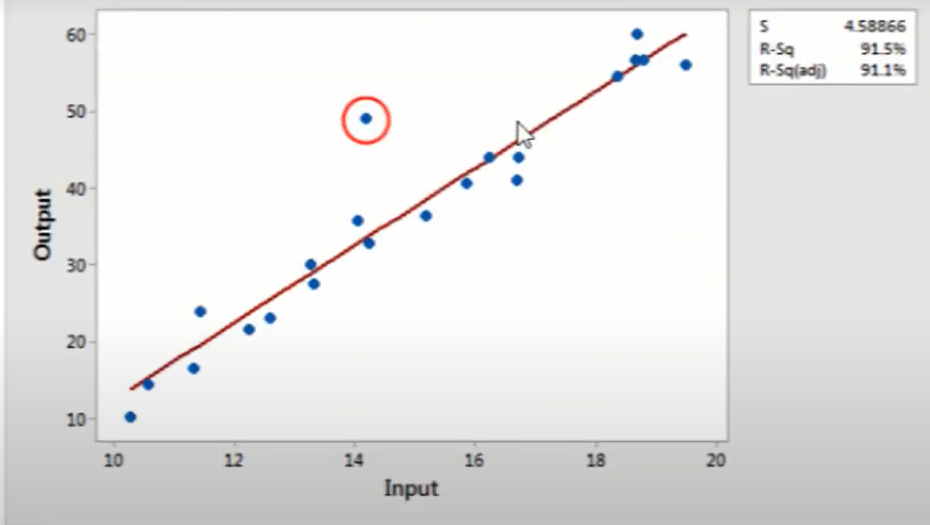

In [8]:
from PIL import Image
img=Image.open("Removing Outliers in Python  The Gaussian Distribution  Normal Distribution Data Set/out.png")
img

### Standard deviation

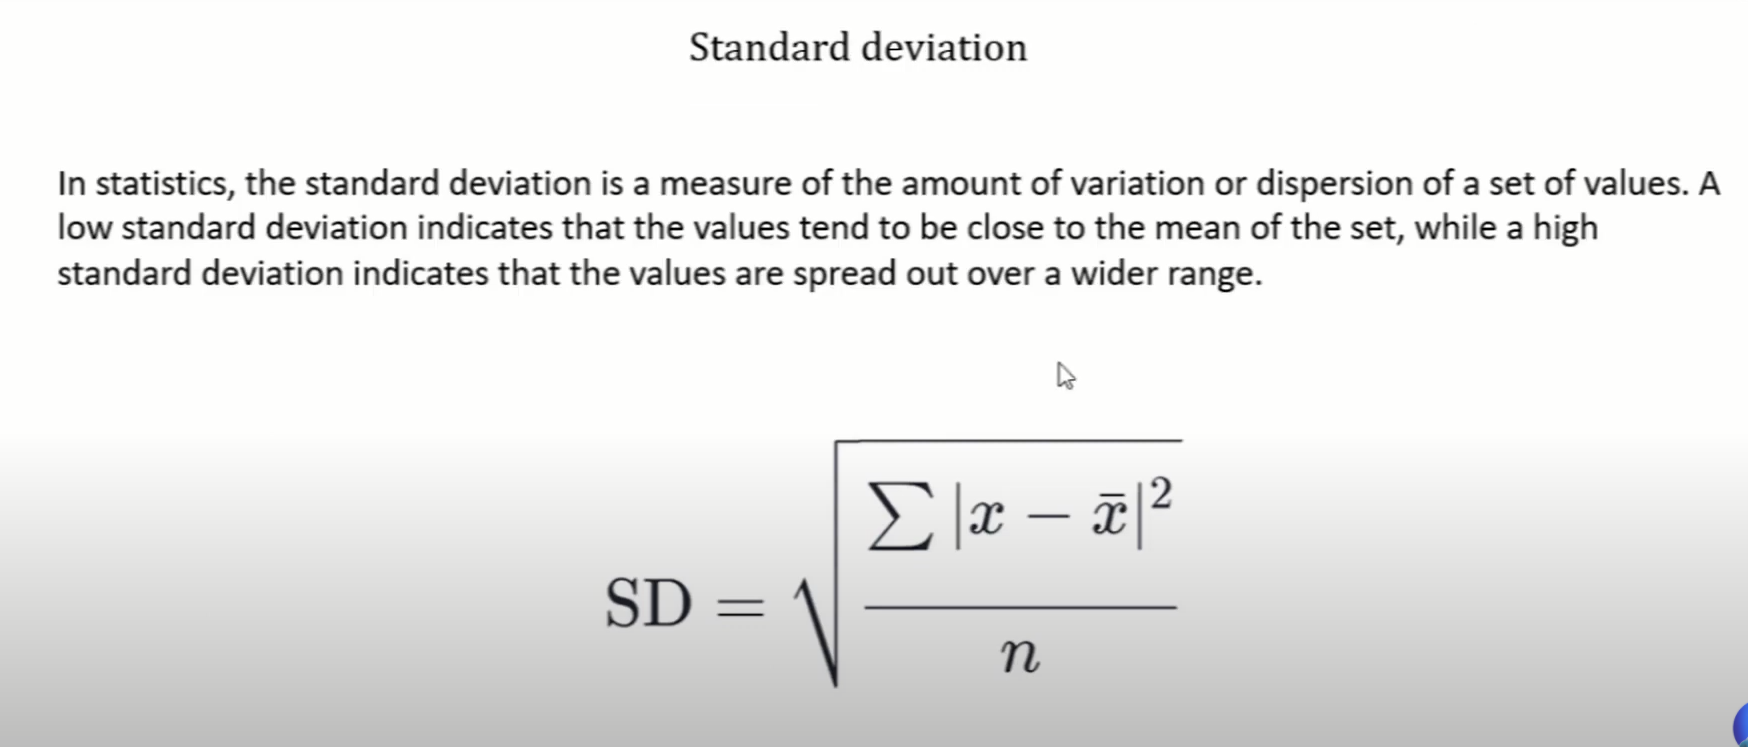

In [9]:
from PIL import Image
img=Image.open("Removing Outliers in Python  The Gaussian Distribution  Normal Distribution Data Set/Standard deviation.png")
img

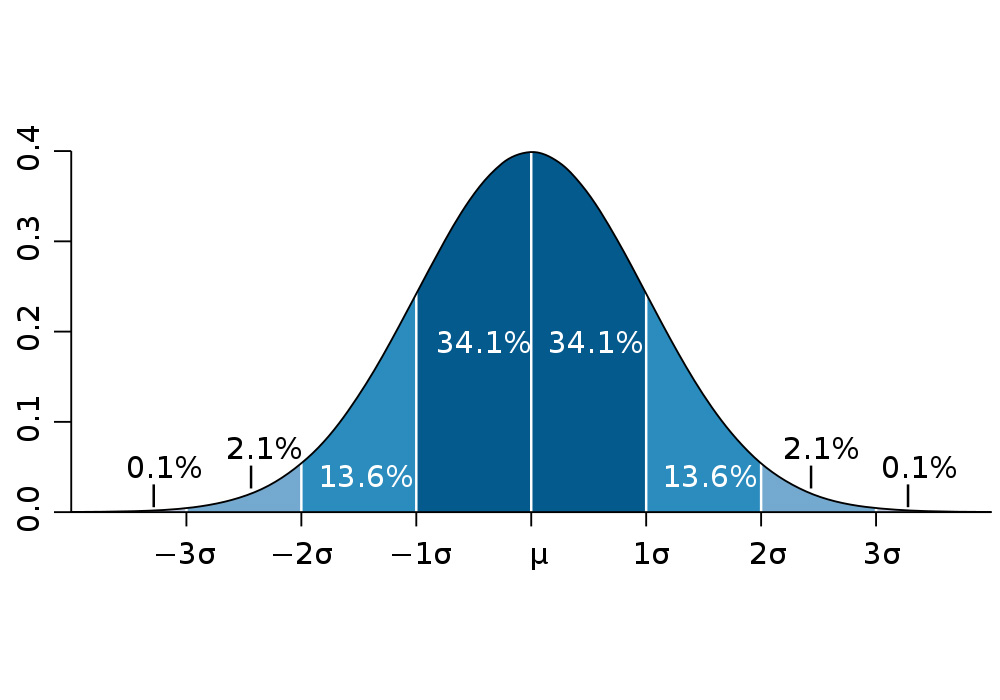

In [10]:
from PIL import Image
img=Image.open("Removing Outliers in Python  The Gaussian Distribution  Normal Distribution Data Set/Standard deviation_diagram.png")
img

### Histogram

<AxesSubplot:xlabel='Weight', ylabel='Count'>

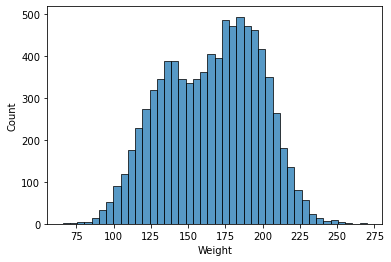

In [11]:
sns.histplot(df["Weight"],kde=False)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

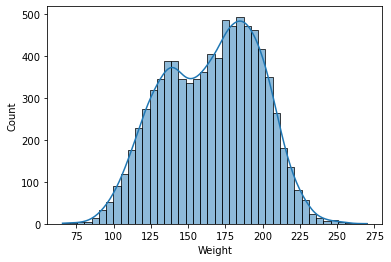

In [12]:
sns.histplot(df["Weight"],kde=True)

<AxesSubplot:ylabel='Frequency'>

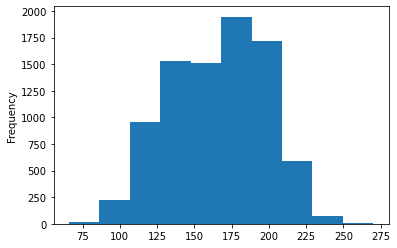

In [13]:
df["Weight"].plot(kind="hist")

### Normal Distribution or Gaussian Distribution

In [14]:
from IPython.display import Image
Image(url="Removing Outliers in Python  The Gaussian Distribution  Normal Distribution Data Set/Normal or Gaussian Distribution.png")

In [15]:
# calculate mean value
mean_value=df["Weight"].mean()
mean_value

165.63273532667586

In [16]:
#Calculate Standard Deviation
std_value=df["Weight"].std()
std_value

32.04392221721549

In [17]:
 #Calculate Standard  positive Deviation2
 std_plus_2=mean_value+(2*std_value)
 std_plus_2

229.72057976110682

In [18]:
 #Calculate Standard negative Deviation2
std_neg_2=mean_value-(2*std_value)
std_neg_2

101.54489089224488

In [19]:
df[df['Weight'] > std_plus_2]   #Outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
82,Male,73.826127,237.916736
190,Male,76.709835,235.035419
191,Male,72.571121,230.560535
197,Male,75.944460,231.924748
...,...,...,...
4569,Male,77.547186,242.041173
4577,Male,73.166638,232.761166
4692,Male,73.706027,231.697887
4701,Male,76.732446,241.686601


In [20]:
df[df['Weight'] < std_neg_2]  #Outlier

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5014,Female,58.438249,98.192621
5026,Female,56.547975,84.872124
5069,Female,61.213172,98.707493
...,...,...,...
8357,Female,60.000657,95.625638
8363,Female,59.408341,101.217203
8364,Female,60.575315,99.286298
8442,Female,61.318284,97.107504


In [21]:
 #Calculate Standard  positive Deviation3
 std_plus_3=mean_value+(3*std_value) 
 std_plus_3

261.7645019783223

In [22]:
 #Calculate Standard negative Deviation2
std_neg_3=mean_value-(3*std_value)
std_neg_3

69.50096867502938

In [23]:
df[df['Weight'] > std_plus_3]   #Outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [24]:
df[df['Weight'] < std_neg_3]  #Outlier

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [25]:
# Merge two type of outliers
marge=df[(df["Weight"]>std_plus_3)|(df["Weight"]<std_neg_3)]

In [26]:
marge.head(10)

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
2014,Male,78.998742,269.989698
5360,Female,55.668202,68.982530


In [27]:
marge.shape

(4, 3)

In [28]:
#drop all outliers
remove_out_columns = df[(df['Weight'] < std_plus_3) & (df['Weight'] > std_neg_3)]  

In [29]:
remove_out_columns.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [30]:
remove_out_columns.shape

(8551, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

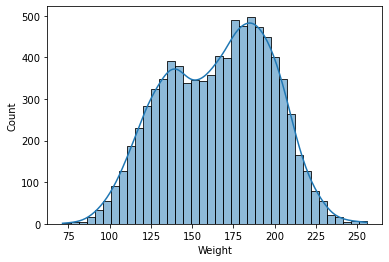

In [31]:
sns.histplot(remove_out_columns["Weight"],kde=True)

### One Hot Encoding

In [32]:
dummy_variables=pd.get_dummies(remove_out_columns['Gender'],drop_first=False)

In [33]:
dummy_variables

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8550,1,0
8551,1,0
8552,1,0
8553,1,0


In [34]:
#true means it will drop one dummy variable
dummy_variables=pd.get_dummies(remove_out_columns['Gender'],drop_first=True)

In [35]:
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [36]:
new_df=remove_out_columns.drop('Gender',axis=1)
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [37]:
#Concat two data frame
df=pd.concat([new_df,dummy_variables],axis=1)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [38]:
df.tail()

,Height,Weight,Male
8550,60.483946,110.565497,0
8551,63.423372,129.921671,0
8552,65.584057,155.942671,0
8553,67.429971,151.678405,0
8554,60.921791,131.253738,0


In [39]:
x=df.drop("Height",axis=1)
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [40]:
y=df["Height"]
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

## Linear regression algorithm

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#split dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [43]:
x_train.shape

(5985, 2)

In [44]:
x_test.shape

(2566, 2)

In [45]:
y_train.shape

(5985,)

In [46]:
y_test.shape

(2566,)

In [47]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [48]:
#Objet Create
reg=LinearRegression()

In [49]:
reg.fit(x_train,y_train)

LinearRegression()

In [50]:
reg.coef_ # m

array([ 0.1234468 , -0.98660239])

In [51]:
reg.intercept_ # c

46.93128204123049

In [52]:
reg.predict(x_test)

array([65.72126577, 64.78641032, 67.79522705, ..., 69.00211426,
       68.04828346, 70.28684906])

In [53]:
reg.predict(x_test).shape

(2566,)

### Model Score

In [54]:
reg.score(x_test,y_test)

0.8578364407986426

In [55]:
y=0.1234468*241.893563+46.93128204123049
y #Weight=241.893563,height=73.847017

76.79226833417889

### Model Evaluation

In [56]:
from sklearn.metrics import mean_squared_error,r2_score

In [57]:
pred=reg.predict(x_test)

In [58]:
pred

array([65.72126577, 64.78641032, 67.79522705, ..., 69.00211426,
       68.04828346, 70.28684906])

In [59]:
mean_squared_error(y_test,pred)

2.1145208634701906

In [60]:
r2_score(y_test,pred)

0.8578364407986426

#### So, Our Model Accuracy is 85.78%